In [1]:
pip install networkx


The following command must be run outside of the IPython shell:

    $ pip install networkx

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


## 기초 코드

In [164]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


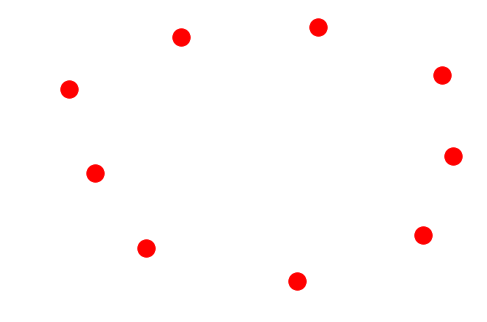

In [83]:
G = nx.Graph() #네트워크 시가고하 정보가 담길 보관함
G.add_nodes_from(['a','b','c','d']) #각각 a부터 d까지의 이름을 가지는 노드를 생성
G.add_nodes_from([('a','b'),('a','b'),('b','c'),('b','d'),('a','c'),('b','c'),
                 ('c','d'),('c','d')]) #각각 노드들 간의 관계를 나타내는 엣지들을 정의
nx.draw(G) #G에 담긴 네트워크 시각화 정보를 어떻게 그릴 것인지 정의
plt.show() #네트워크 그래프 출력

### 노드

노드는 네트워크의 얼굴을 결정하는 중요한 요소
분석하고자하는 대상들을 가장 잘 보여줄 수 있도록 나타내야 한다.

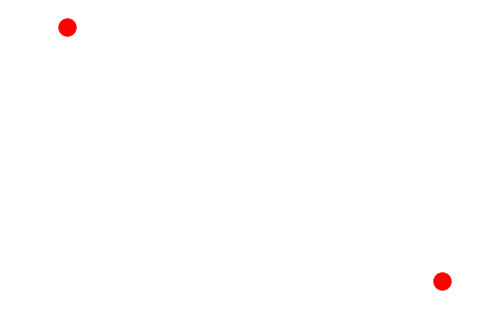

In [87]:
G = nx.Graph()
G.add_node('a') #string 타입의 노드를 추가
G.add_node(1) # int 타입의 노드를 추가
nx.draw(G) #노드 그려보기

In [84]:

#csv 파일 열기
df = pd.read_csv("C:/Users/Jang Ye Seul/jupyter notebook/featuring.csv",encoding = 'cp949')


In [131]:
From = list(df["from"])
To = list(df["to"])

Edge = []
for i in range(len(df)):
    row = df.iloc[i,].tolist()
    Edge.append(row)
Edge

[['아이유', 'G-DRAGON'],
 ['에픽하이', '아이유'],
 ['에픽하이', '오혁'],
 ['아이유', '오혁'],
 ['HIGH4', '아이유'],
 ['에픽하이', 'MINO'],
 ['에픽하이', '사이먼 도미닉'],
 ['에픽하이', '더콰이엇'],
 ['에픽하이', '수현'],
 ['MINO', '사이먼 도미닉'],
 ['MINO', '더콰이엇'],
 ['사이먼 도미닉', '더콰이엇']]

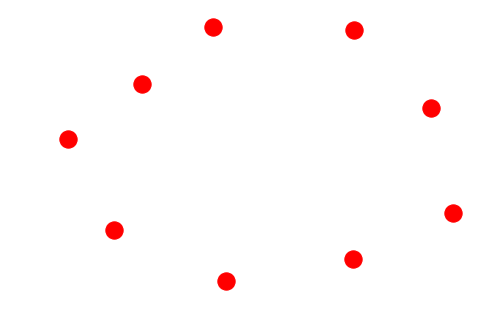

In [81]:
G = nx.Graph() # 네트워크 시각화 정보가 담길 보관함
G.add_nodes_from(From)
G.add_nodes_from(To)
# add_nodes_from 메소드를 사용하여 df의 배열값 모두를 원소로 정의

G.nodes() #선언된 노드들의 집합을 보여줌
nx.draw(G) # 네트워크 그래프 그리기

### 엣지

 엣지는 노드와 노드를 연결하는 "관계"를 나타내주는 개념
 
 엣지는 네트워크의 보이는 모습을 결정하는 중요한 요소이므로,
 분석하고자 하는 대상들 간의 관계를 가장 잘 보여줄 수 있도록 나타내야 한다.


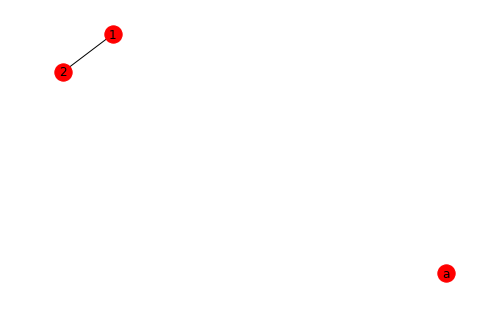

In [90]:
G = nx.Graph()
G.add_node('a') # string 타입의 노드를 추가
G.add_node(1) #int 타입의 노드를 추가

G.add_edge(1,2)

nx.draw(G,with_labels = True) #노드 그려보기

<function matplotlib.pyplot.show(*args, **kw)>

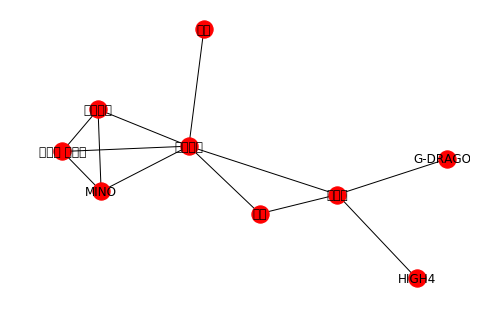

In [132]:
G = nx.Graph() # networkx 객체를 선언

G.add_nodes_from(From) # 노드 집합을 정의
G.add_edges_from(Edge) # 엣지 집합을 정의

nx.draw(G, with_labels = True) #노드명 표기를 True로 하여 네트워크 그래프를 시각화
plt.show

### 가중치

'관계의 정도'를 시각화로 나타내기 위해 가중치를 반영한 엣지를 만들어보자

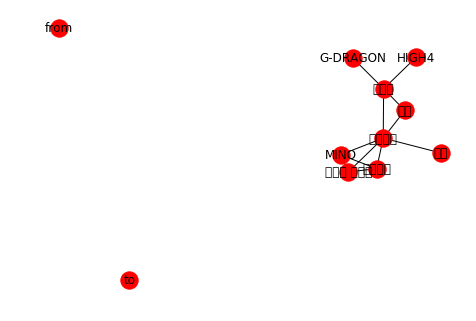

In [146]:
G = nx.Graph() # network 객체를 선언
G.add_nodes_from(df) #노드 집합을 선언

for i in range(len(Edge)): #엣지 집합을 선언하기 위한 for문
    G.add_edge(Edge[i][0],Edge[i][1], weight=1) #엣지 데이터 리스트의 각 원소에 대해 엣지를 정의하고 가중치를 부여 
nx.draw(G, with_labels = True)
plt.rcParams['font.family'] = 'Malgun Gothic'   # 맑은 고딕으로 글씨체 변경 (한글 깨짐 현상 방지)
plt.show()

In [139]:
G.edges(data = True) # 엣지 집합에 대한 결과를 데이터와 함께 보여준다

EdgeDataView([('아이유', 'G-DRAGON', {'weight': 1}), ('아이유', '에픽하이', {'weight': 1}), ('아이유', '오혁', {'weight': 1}), ('아이유', 'HIGH4', {'weight': 1}), ('에픽하이', '오혁', {'weight': 1}), ('에픽하이', 'MINO', {'weight': 1}), ('에픽하이', '사이먼 도미닉', {'weight': 1}), ('에픽하이', '더콰이엇', {'weight': 1}), ('에픽하이', '수현', {'weight': 1}), ('MINO', '사이먼 도미닉', {'weight': 1}), ('MINO', '더콰이엇', {'weight': 1}), ('사이먼 도미닉', '더콰이엇', {'weight': 1})])

### 시각화

networkx객체를 시각화 하기 위해서 nx.Draw()를 기본으로 사용한다

In [180]:
result = np.unique(df[['from','to']].values)
print(type(result))
result

<class 'numpy.ndarray'>


array(['G-DRAGON', 'HIGH4', 'MINO', '더콰이엇', '사이먼 도미닉', '수현', '아이유',
       '에픽하이', '오혁'], dtype=object)

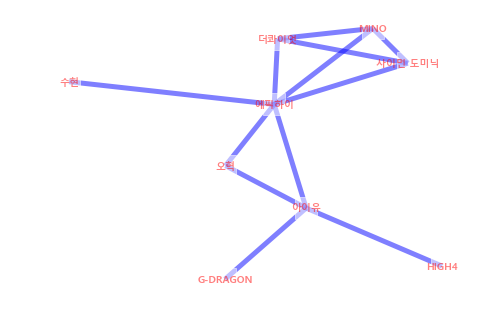

In [181]:
G= nx.Graph() #networkx 객체를 선언

G.add_nodes_from(result) #노드 집합을 선언

for i in range(len(Edge)): #엣지 집합을 선언하기 위한 for문
    G.add_edge(Edge[i][0],Edge[i][1], weight=1) #엣지 데이터 리스트의 각 원소에 대해 엣지를 정의하고 가중치를 부여 

nx.draw(G,
        with_labels = True, #노드명을 표기
        font_weight = 'bold' ,# 폰트를 볼드체로 변경
       font_family ='MalGun Gothic',#맑은 고딕으로 변경 
        #(이전에 한글 폰트에서 그래프 시각화에서 한글 깨짐 오류가 있었으므로 제대로 한글 표기를 위한 필수 옵션)
       font_size = 10, #폰트 사이즈를 10으로 설정
       font_color = 'red', # 폰트 컬러를 red로 설정
       node_size = 500, # 노드 크기를 500으로 설정
       node_color ='white',#노드 컬러를 white로 설정
       node_shape = 's', #노드 모양을 정사각형(s)로 설정
       alpha = 0.5, #노드의 투명도를 0.5로 설정
       edge_color = 'blue', #엣지의 컬러를 blue로 설정
       width = 5) #엣지의 두께를 5로 설정

plt.show()